In [25]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import KFold


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

SEED=42
cpu=-1
datasetFolder=os.path.dirname(os.path.dirname(os.getcwd()))

def predict_score(model,x_train,y_train,x_test,y_test,name):
    model.fit(x_train,y_train)
    estimator=model.best_estimator_
    features=estimator.named_steps["feature_selection"].get_feature_names_out(input_features=x_train.columns)
    y_predict=model.predict(x_test)
    f1=f1_score(y_test,y_predict)
    auc_score=roc_auc_score(y_test,y_predict)
    return f1,auc_score,features
    
def baseDataSet(x_train,x_test):
    new_x_train=x_train[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x"]]
    new_x_test=x_test[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x"]]
    return new_x_train,new_x_test

def addMetricsDataSet(x_train,x_test):
    new_x_train=x_train[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","tcc_x","NprotM_x","BOvR_x","ATFD_x","ATLD_x","LAA_x","BUR_x","FDP_x"]]
    new_x_test=x_test[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","tcc_x","NprotM_x","BOvR_x","ATFD_x","ATLD_x","LAA_x","BUR_x","FDP_x"]]
    return new_x_train,new_x_test

def baseVersionDataSet(x_train,x_test):
    new_x_train=x_train[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","dit_y","fanin_y","fanout_y","lcc_y","lcom*_y","loc_y","noc_y","rfc_y","innerClassesQty_y","totalFieldsQty_y","totalMethodsQty_y","wmc_y"]]
    new_x_test=x_test[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","dit_y","fanin_y","fanout_y","lcc_y","lcom*_y","loc_y","noc_y","rfc_y","innerClassesQty_y","totalFieldsQty_y","totalMethodsQty_y","wmc_y"]]
    return new_x_train,new_x_test

def addMetricsVersionDataSet(x_train,x_test):
    new_x_train=x_train[['dit_x', 'fanin_x', 'fanout_x', 'lcc_x', 'lcom*_x', 'loc_x', 'noc_x', 'rfc_x', 'innerClassesQty_x', 'totalFieldsQty_x', 'totalMethodsQty_x', 'wmc_x', 'tcc_x', 'NprotM_x', 'BOvR_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'BUR_x', 'FDP_x', 'dit_y', 'fanin_y', 'fanout_y', 'lcc_y', 'lcom*_y', 'loc_y', 'noc_y', 'rfc_y', 'innerClassesQty_y', 'totalFieldsQty_y', 'totalMethodsQty_y', 'wmc_y', 'tcc_y', 'NprotM_y', 'BOvR_y', 'ATFD_y', 'ATLD_y', 'LAA_y', 'BUR_y', 'FDP_y']]
    new_x_test=x_test[['dit_x', 'fanin_x', 'fanout_x', 'lcc_x', 'lcom*_x', 'loc_x', 'noc_x', 'rfc_x', 'innerClassesQty_x', 'totalFieldsQty_x', 'totalMethodsQty_x', 'wmc_x', 'tcc_x', 'NprotM_x', 'BOvR_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'BUR_x', 'FDP_x', 'dit_y', 'fanin_y', 'fanout_y', 'lcc_y', 'lcom*_y', 'loc_y', 'noc_y', 'rfc_y', 'innerClassesQty_y', 'totalFieldsQty_y', 'totalMethodsQty_y', 'wmc_y', 'tcc_y', 'NprotM_y', 'BOvR_y', 'ATFD_y', 'ATLD_y', 'LAA_y', 'BUR_y', 'FDP_y']]
    return new_x_train,new_x_test


def overSampling(x_train,y_train):
    x_sampling,y_sampling=SMOTE(sampling_strategy=0.2,random_state=SEED).fit_resample(x_train,y_train)
    return x_sampling,y_sampling

In [26]:
RefusedBequestFile=os.path.join(datasetFolder,"dataset2\\RefusedBequest.csv")
factors=["dit","fanin","fanout","lcc","lcom*","loc","noc","rfc","innerClassesQty","totalFieldsQty","totalMethodsQty","wmc","tcc","NprotM","BOvR","ATFD","ATLD","LAA","BUR","FDP",]
df=pd.read_csv(RefusedBequestFile,encoding_errors="replace")
df=df.dropna(how="any")
x=df.drop(columns=["file","class","type","RefusedBequest"])
for factor in factors:
    df[factor+"_y"]=df[factor+"_x"]-df[factor+"_y"]
y=df[["RefusedBequest"]].values.ravel()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=SEED)
x_sampling,y_sampling=overSampling(x_train,y_train)

x_base_train,x_base_test=baseDataSet(x_sampling,x_test)
y_base_train=y_sampling
y_base_test=y_test
base_score={"f1":[],"auc":[],"feature":[]}
#x_train_base,y_train_base,x_test_base,y_test_base,features_base=create_train_test_data(x_base,y_base)

x_add_train,x_add_test=addMetricsDataSet(x_sampling,x_test)
y_add_train=y_sampling
y_add_test=y_test
add_score={"f1":[],"auc":[],"feature":[]}

#x_train_add,y_train_add,x_test_add,y_test_add,features_add=create_train_test_data(x_add,y_add)

x_baseVersion_train,x_baseVersion_test=baseVersionDataSet(x_sampling,x_test)
y_baseVersion_train=y_sampling
y_baseVersion_test=y_test
baseVersion_score={"f1":[],"auc":[],"feature":[]}

x_addVersion_train,x_addVersion_test=addMetricsVersionDataSet(x_sampling,x_test)
y_addVersion_train=y_sampling
y_addVersion_test=y_test
addVersion_score={"f1":[],"auc":[],"feature":[]}


In [27]:
name="DT"
DT_prameter={
    "classifier__criterion":["gini","entropy"],
    "classifier__max_depth":list(range(1,11)),
    "classifier__min_samples_split":list(range(2,21)),
    "classifier__min_samples_leaf":list(range(1,11)),
    "classifier__max_features":["sqrt","log2",None]
    }

k_range=np.arange(1,11,1)
for i in k_range:
    pipline=Pipeline([
        #("polynomial_features",PolynomialFeatures(degree=2)),
        ("minmaxscaler",MinMaxScaler()),
        ("feature_selection",SelectKBest(score_func=f_classif,k=i)),
        ("classifier",DecisionTreeClassifier(random_state=SEED))
    ])
    DT_model=RandomizedSearchCV(pipline, param_distributions=DT_prameter,cv=KFold(n_splits=10,shuffle=True,random_state=SEED),random_state=SEED,n_jobs=cpu)
    print(str(i))
    f1_base,auc_base,feature_base=predict_score(DT_model,x_base_train,y_base_train,x_base_test,y_base_test,name)
    base_score["f1"].append(f1_base)
    base_score["auc"].append(auc_base)
    base_score["feature"].append(feature_base)
    
    f1_add,auc_add,feature_add=predict_score(DT_model,x_add_train,y_add_train,x_add_test,y_add_test,name)
    add_score["f1"].append(f1_add)
    add_score["auc"].append(auc_add)
    add_score["feature"].append(feature_add)
    
    f1_baseVersion,auc_baseVersion,feature_baseVersion=predict_score(DT_model,x_baseVersion_train,y_baseVersion_train,x_baseVersion_test,y_baseVersion_test,name)
    baseVersion_score["f1"].append(f1_baseVersion)
    baseVersion_score["auc"].append(auc_baseVersion)
    baseVersion_score["feature"].append(feature_baseVersion)

    f1_addVersion,auc_addVersion,feature_addVersion=predict_score(DT_model,x_addVersion_train,y_addVersion_train,x_addVersion_test,y_addVersion_test,name)
    addVersion_score["f1"].append(f1_addVersion)
    addVersion_score["auc"].append(auc_addVersion)   
    addVersion_score["feature"].append(feature_addVersion)

    #features_baselist.append(baseDF.columns[features_base])
    #features_addlist.append(addMetricsDF.columns[features_add])


1
2
3
4
5
6
7
8
9
10


base
f1 :  0.08403361344537816
auc_score :  0.6275663806958371
Index(['dit_x', 'fanin_x', 'fanout_x', 'rfc_x', 'wmc_x'], dtype='object')

addMetrics
f1 :  0.10569105691056911
auc_score :  0.6700273898182312
Index(['dit_x', 'fanout_x', 'rfc_x', 'BOvR_x', 'BUR_x'], dtype='object')

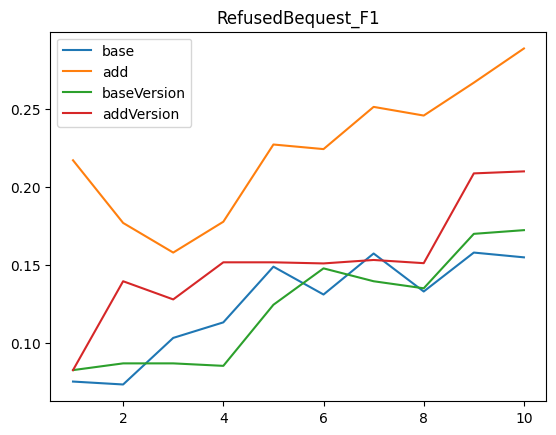

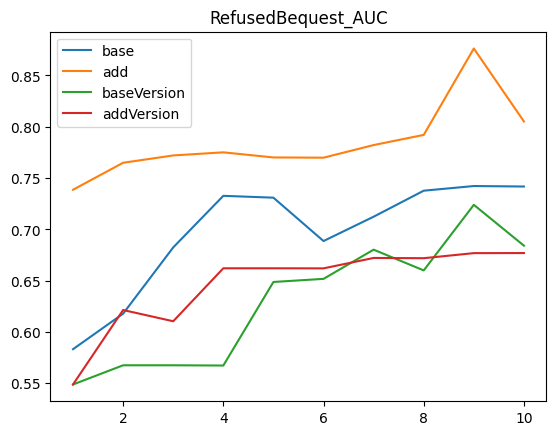

In [28]:
import matplotlib.pyplot as plt

x=k_range
plt.title("RefusedBequest_F1")
plt.plot(x,base_score["f1"],label="base")
plt.plot(x,add_score["f1"],label="add")
plt.plot(x,baseVersion_score["f1"],label="baseVersion")
plt.plot(x,addVersion_score["f1"],label="addVersion")
plt.legend()
plt.show()

plt.title("RefusedBequest_AUC")
plt.plot(x,base_score["auc"],label="base")
plt.plot(x,add_score["auc"],label="add")
plt.plot(x,baseVersion_score["auc"],label="baseVersion")
plt.plot(x,addVersion_score["auc"],label="addVersion")
plt.legend()
plt.show()